### Viewing the outputs of RiverML

In [1]:
# Run imports
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.patches import Patch
import numpy as np
import pandas as pd

In [ ]:
def plot_gdf_with_colormap(
    gdf,
    column='r',
    figsize=(12, 8),
    cmap='viridis',
    title=None,
    legend_title=None,
    save_path=None
):
    """
    Plot a GeoDataFrame with a colormap and legend.
    
    Parameters:
    -----------
    gdf : GeoDataFrame
        The geodataframe to plot
    column : str
        The column name to use for coloring (default: 'r')
    figsize : tuple
        Figure size (width, height)
    cmap : str
        Matplotlib colormap name
    title : str
        Plot title (if None, uses column name)
    legend_title : str
        Legend title (if None, uses column name)
    save_path : str
        Path to save the figure (optional)
    """
    
    # Create figure and axis
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Get the values for coloring
    values = gdf[column]
    
    # Remove any infinite or NaN values for plotting
    clean_values = values.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Calculate vmax as 90th percentile
    vmax = clean_values.quantile(0.9)
    vmin = clean_values.min()
    
    # Plot the geodataframe
    gdf.plot(ax=ax, 
             column=column, 
             cmap=cmap,
             linewidth=0.5,
             legend=True,
             vmin=vmin,
             vmax=vmax,
             legend_kwds={'shrink': 0.8, 'aspect': 30})
    
    # Set title
    if title is None:
        title = f'{column} Values'
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Remove axis ticks for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add some statistics as text (including vmax info)
    stats_text = f'Min: {clean_values.min():.3f}\n'
    stats_text += f'Max: {clean_values.max():.3f}\n'
    stats_text += f'P90 (vmax): {vmax:.3f}\n'
    stats_text += f'Mean: {clean_values.mean():.3f}\n'
    stats_text += f'Count: {len(clean_values)}'
    
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', 
            facecolor='white', alpha=0.8), fontsize=9)
    
    plt.tight_layout()
    
    # Save figure if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary Statistics for {column}:")
    print(f"Count: {len(clean_values)}")
    print(f"Mean: {clean_values.mean():.6f}")
    print(f"Std: {clean_values.std():.6f}")
    print(f"Min: {clean_values.min():.6f}")
    print(f"25%: {clean_values.quantile(0.25):.6f}")
    print(f"50%: {clean_values.quantile(0.50):.6f}")
    print(f"75%: {clean_values.quantile(0.75):.6f}")
    print(f"Max: {clean_values.max():.6f}")

In [3]:
# Load in predictions, and rename columns
df_r = pd.read_parquet("../data/r_out/r_predictions.parquet")
df_r["r"] = df_r["prediction"].copy()

df_TW = pd.read_parquet("../data/TW_bf_out/TW_bf_predictions.parquet")
df_TW["TW"] = df_TW["prediction"].copy()

df_Y = pd.read_parquet("../data/Y_bf_out/Y_bf_predictions.parquet")
df_Y["Y"] = df_Y["prediction"].copy()


In [4]:
# Load in the reference fabric, and copy over predicted values
gdf = gpd.read_file("../data/sc_reference_fabric.gpkg", layer="reference_flowpaths")
gdf = gdf.merge(df_r, left_on='flowpath_id', right_on='FEATUREID', how='left')
gdf = gdf.drop('FEATUREID', axis=1)
gdf = gdf.drop('prediction', axis=1)

gdf = gdf.merge(df_TW, left_on='flowpath_id', right_on='FEATUREID', how='left')
gdf = gdf.drop('FEATUREID', axis=1)
gdf = gdf.drop('prediction', axis=1)

gdf = gdf.merge(df_Y, left_on='flowpath_id', right_on='FEATUREID', how='left')
gdf = gdf.drop('FEATUREID', axis=1)
gdf = gdf.drop('prediction', axis=1)

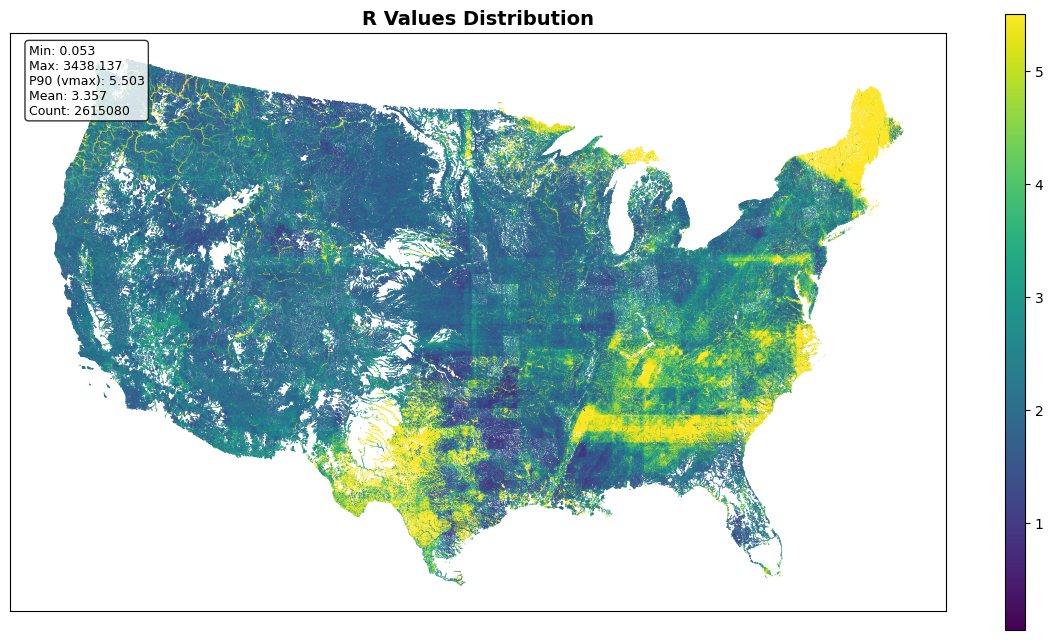


Summary Statistics for r:
Count: 2615080
Mean: 3.356881
Std: 5.647520
Min: 0.052809
25%: 1.873887
50%: 2.295756
75%: 3.316222
Max: 3438.136719


In [ ]:
plot_gdf_with_colormap(gdf, column='r', cmap='viridis', title='R Values Distribution')

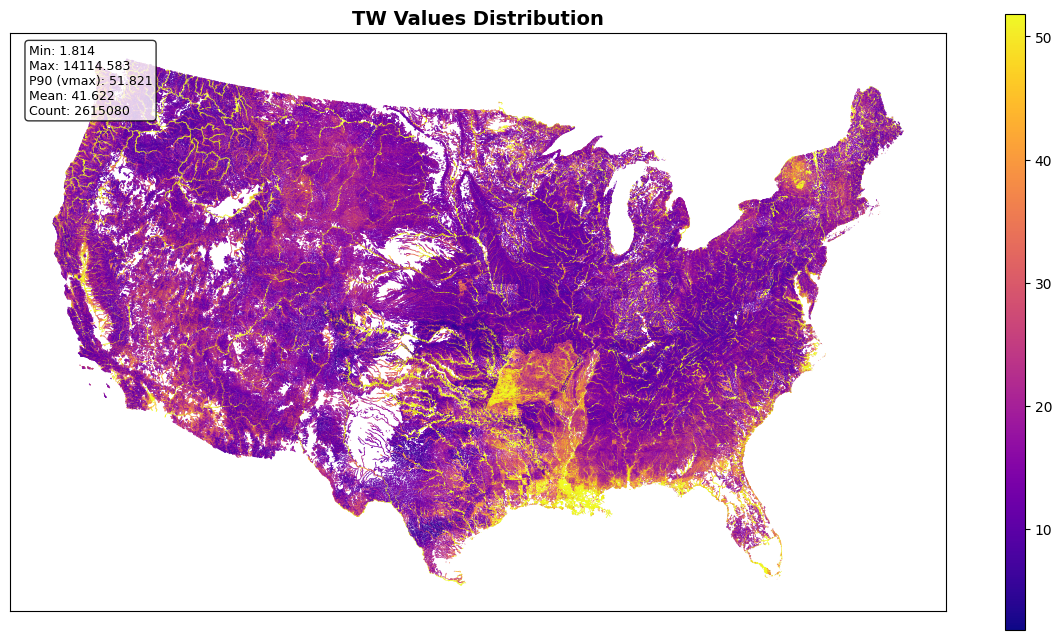


Summary Statistics for TW:
Count: 2615080
Mean: 41.621769
Std: 168.773315
Min: 1.813823
25%: 13.006785
50%: 18.430773
75%: 29.166564
Max: 14114.583008


In [6]:
plot_gdf_with_colormap(gdf, column='TW', cmap='plasma', title='TW Values Distribution')

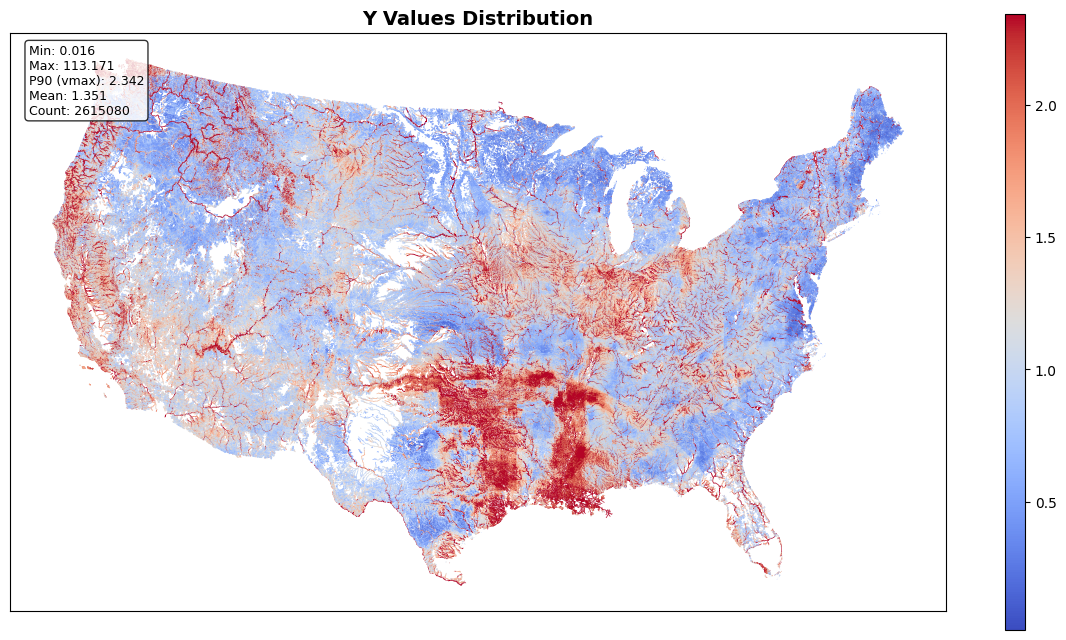


Summary Statistics for Y:
Count: 2615080
Mean: 1.350599
Std: 1.259180
Min: 0.015931
25%: 0.772847
50%: 1.040985
75%: 1.488139
Max: 113.171089


In [7]:
plot_gdf_with_colormap(gdf, column='Y', cmap='coolwarm', title='Y Values Distribution')